In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('netflix.csv')
df.shape

(8807, 12)

In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Data Cleaning Preprocessing

In [4]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [5]:
df.isna().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [8]:
df.duplicated().any()

False

In [9]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Univariate Analysis

In [11]:
df['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [13]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [14]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

([<matplotlib.patches.Wedge at 0x20cdd00cb80>,
 [Text(-0.6357552620136555, 0.897672126570692, 'Movie'),
  Text(0.6357552620136554, -0.8976721265706921, 'TV Show')],
 [Text(-0.3467755974619939, 0.4896393417658319, '69.62%'),
  Text(0.3467755974619938, -0.48963934176583196, '30.38%')])

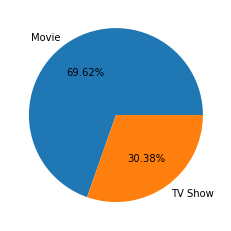

In [17]:
plt.pie(df['type'].value_counts(), labels = df['type'].value_counts().index, autopct='%0.2f%%')

## Duration of movie/ No. of Seasons

In [18]:
df['duration'] = df['duration'].str.split().apply(pd.Series)[0]
df['duration']

0        90
1         2
2         1
3         1
4         2
       ... 
8802    158
8803      2
8804     88
8805     88
8806    111
Name: duration, Length: 8807, dtype: object

In [19]:
df['duration'].isna().sum()

3

In [20]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [21]:
df['duration'].fillna(75, inplace = True)

In [22]:
df['duration'] = df['duration'].astype('int')
df['duration']

0        90
1         2
2         1
3         1
4         2
       ... 
8802    158
8803      2
8804     88
8805     88
8806    111
Name: duration, Length: 8807, dtype: int32

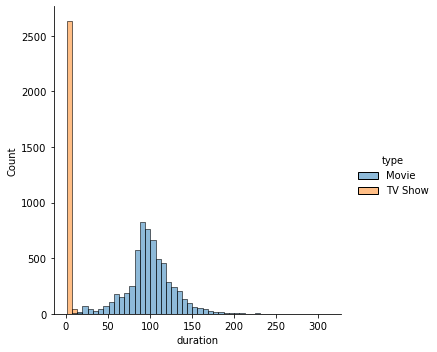

In [23]:
sns.displot(x='duration', data=df, bins=50, hue='type');

In [24]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [25]:
df['date_added'].isna().sum()

10

In [26]:
df['date_added'].fillna(pd.to_datetime('01/01/1900'), inplace=True)

In [27]:
df['date_added'].isna().sum()

0

In [28]:
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

In [29]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021


In [30]:
data_movies = df[df['type'] == 'Movie'][['year_added', 'month_added']]
data_shows = df[df['type'] == 'TV Show'][['year_added', 'month_added']]

In [31]:
data_movies.shape

(6131, 2)

In [32]:
data_shows.shape

(2676, 2)

In [33]:
data_movies.head()

,year_added,month_added
0,2021,9
6,2021,9
7,2021,9
9,2021,9
12,2021,9


In [34]:
count = pd.DataFrame(columns=['Movies', 'Shows'])
count

,Movies,Shows


In [35]:
data_movies.groupby(by='year_added').count()['month_added']

year_added
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     253
2017     839
2018    1237
2019    1424
2020    1284
2021     993
Name: month_added, dtype: int64

In [36]:
data_shows.groupby(by='year_added').count()['month_added'].iloc[1:,]

year_added
2008      1
2013      5
2014      5
2015     26
2016    176
2017    349
2018    412
2019    592
2020    595
2021    505
Name: month_added, dtype: int64

In [37]:
count['Movies'] = data_movies.groupby(by='year_added').count()['month_added']
count['Shows'] = data_shows.groupby(by='year_added').count()['month_added'].iloc[1:,]

In [38]:
count.head()

,Movies,Shows
year_added,,
2008,1,1.0
2009,2,NaN
2010,1,NaN
2011,13,NaN
2012,3,NaN


In [39]:
count.fillna(0, inplace=True)

In [40]:
count = count.astype('int')
count

,Movies,Shows
year_added,,
2008,1,1
2009,2,0
2010,1,0
2011,13,0
2012,3,0
2013,6,5
2014,19,5
2015,56,26
2016,253,176


<AxesSubplot:xlabel='year_added'>

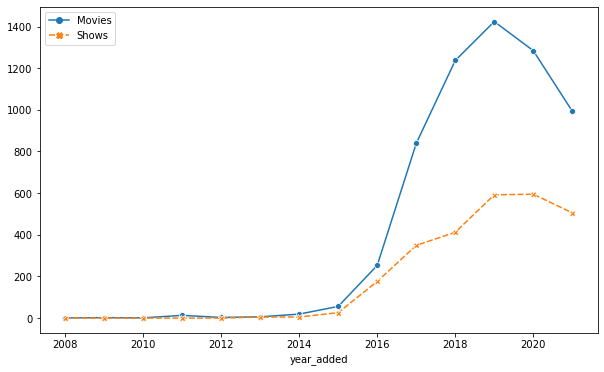

In [41]:
plt.figure(figsize=(10,6))
sns.lineplot(data=count, markers=True)

In [45]:
month_wise_count = df.groupby(by=['year_added', 'month_added']).count().iloc[1:,-1].unstack()
month_wise_count

month_added,1,2,3,4,5,6,7,8,9,10,11,12
year_added,,,,,,,,,,,,
2008,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2011,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,11.0,NaN,NaN
2012,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2013,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2.0,3.0,2.0,2.0
2014,2.0,2.0,NaN,2.0,NaN,1.0,1.0,1.0,1.0,4.0,4.0,6.0
2015,1.0,4.0,5.0,5.0,6.0,6.0,7.0,2.0,7.0,14.0,4.0,21.0
2016,43.0,15.0,17.0,22.0,13.0,18.0,28.0,34.0,48.0,51.0,44.0,96.0


<AxesSubplot:xlabel='month_added', ylabel='year_added'>

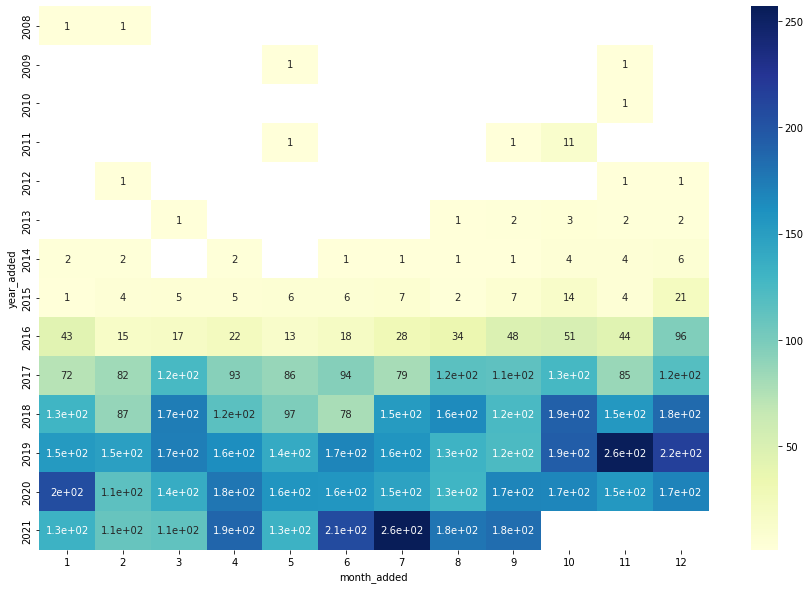

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(month_wise_count, cmap='YlGnBu', annot=True)

In [55]:
top_10_countries = df['country'].value_counts()[:10]
top_10_countries

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

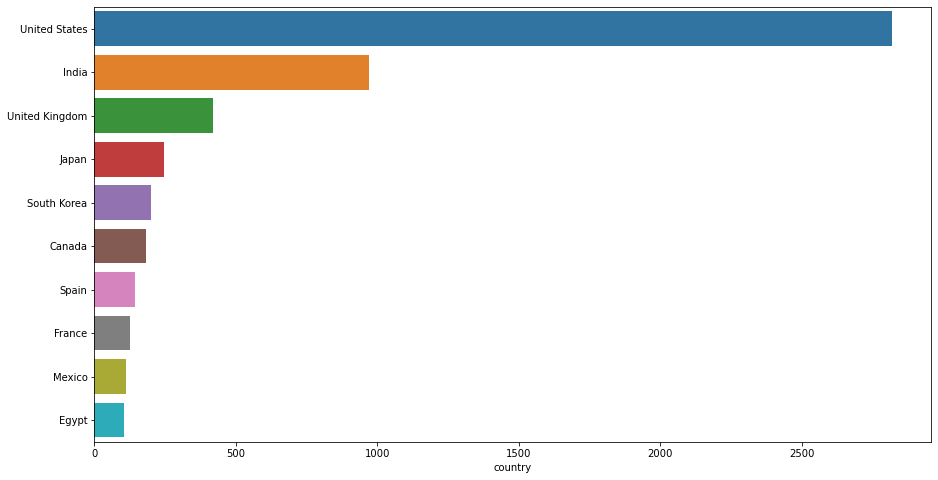

In [56]:
plt.figure(figsize=(15,8))
sns.barplot(x=top_10_countries, y=top_10_countries.index)
plt.show()

## Actors

In [57]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021


In [58]:
df['cast'].dropna()

1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
5       Kate Siegel, Zach Gilford, Hamish Linklater, H...
6       Vanessa Hudgens, Kimiko Glenn, James Marsden, ...
                              ...                        
8801    Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 7982, dtype: object

In [59]:
actors = " ".join(df['cast'].dropna())

In [60]:
actors= list(map(lambda x: x.strip(), actors.split(",")))
actors[:5]

['Ama Qamata',
 'Khosi Ngema',
 'Gail Mabalane',
 'Thabang Molaba',
 'Dillon Windvogel']

In [61]:
from collections import Counter

In [62]:
Counter(actors).most_common(10)

[('Anupam Kher', 37),
 ('Rupa Bhimani', 31),
 ('Takahiro Sakurai', 29),
 ('Julie Tejwani', 28),
 ('Om Puri', 27),
 ('Paresh Rawal', 25),
 ('Andrea Libman', 24),
 ('Jigna Bhardwaj', 23),
 ('Rajesh Kava', 22),
 ('Vincent Tong', 22)]